# Notebook 3: More EDA and Cleaning: Numeric features.

David Tersegno

4/1/22


This notebook deals with missing values caused by concatenating the data, then makes a few last-minute feature drops.

It then covers a few correlations in the numeric features.

It then reviews some of the distributions and pairplots.

The modified data is saved one last time, into `./data_clean_num/`

# Import libraries

In [59]:
#import any libraries needed

import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

##############################
#   comment for light mode   #
##############################
plt.style.use('dark_background')
###############################

## Import dummified data

In [60]:
#import dummified data
lua_dum = pd.read_csv('./data_clean/lua_dum.csv')
has_dum = pd.read_csv('./data_clean/haskell_dum.csv')
lis_dum = pd.read_csv('./data_clean/lisp_dum.csv')

In [61]:
#concatenate all of the data into one dataframe.
df = pd.concat([lua_dum, has_dum, lis_dum])

In [62]:
#examine the basics of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 999
Columns: 423 entries, created_utc to crosspost_subreddit_stumpwm
dtypes: bool(5), float64(387), int64(24), object(7)
memory usage: 9.6+ MB


In [63]:
#there are many with null selftext.
df['selftext'].isnull().sum()

960

In [64]:
#...but none with no title. These are likely posts with just links or media.
# pay attention to those posts!
df['title'].isnull().sum()

0

In [65]:
# all of the others have 2000+ null values. these are from dummies that weren't made in the
# individuals. Fill in these nulls with zeros.

# this is a pretty big sweeping action, but the columns have been verified.
# Clear them.

df.fillna(0, inplace = True)

In [66]:
#take a look at some sample types.
df.dtypes[:20]

created_utc                                                                        int64
is_crosspostable                                                                    bool
is_original_content                                                                 bool
is_reddit_media_domain                                                              bool
is_robot_indexable                                                                  bool
is_self                                                                             bool
num_comments                                                                       int64
score                                                                              int64
selftext                                                                          object
subreddit                                                                         object
title                                                                             object
upvote_ratio         

Keep track of the numerically typed data. So we may examine it.

In [67]:
# list numerical types. Don't print --- there are a lot of them.
numerical_types = [
    column 
    for column in df.columns
    if df[column].dtype == 'float64' or df[column].dtype == 'int64'
]


# remove strings whose name starts with starts_with from a list of strings.
# does not modify the original. This function returns a new list.
def remove_entry_starting_with(a_list:list, starts_with:str):
    a_list_copy = list(a_list)
    starts_with_length = len(starts_with)
    for a_string in a_list:
        if a_string.startswith(starts_with):
            a_list_copy.remove(a_string)
    return a_list_copy

In [68]:
#get rid of any dummy variables.
numerical_types = remove_entry_starting_with(numerical_types, 'domain')
numerical_types = remove_entry_starting_with(numerical_types, 'crosspost_subreddit')
#list the remaining columns.
numerical_types

['created_utc',
 'num_comments',
 'score',
 'upvote_ratio',
 'thumbnail_height',
 'thumbnail_width',
 'is_crosspost',
 'thumbnail_default',
 'thumbnail_image',
 'thumbnail_self',
 'post_hint_hosted:video',
 'post_hint_image',
 'post_hint_link',
 'post_hint_rich:video',
 'post_hint_self',
 'thumbnail_spoiler']

In [69]:
# list object types.
object_types = [
    column
    for column in df.columns
    if df[column].dtype == 'O'
]

object_types

['selftext',
 'subreddit',
 'title',
 'banned_by',
 'poll_data',
 'date',
 'author_flair_template_id']

In [70]:
# poll data looks valuable, but it won't be dealt with here.
object_types.remove('poll_data')
df.drop(columns ='poll_data', inplace=True)

In [71]:
df['banned_by'].value_counts()

0             2998
moderators       2
Name: banned_by, dtype: int64

`banned _by` is interesting. I wish there were more ban instances so I could get a sense of
differences from subreddit to subreddit. But I really don't think there are enough cases to grab onto here.

In [72]:
# new feature just dropped
object_types.remove('banned_by')
df.drop(columns = 'banned_by', inplace = True)

In [73]:
#list remaining object types
object_types

['selftext', 'subreddit', 'title', 'date', 'author_flair_template_id']

In [74]:
#I think author_flair_template_id snuck out.
df['author_flair_template_id'].unique()

array([0, 'e88a9064-978c-11e5-ab20-0eed8c938c85',
       'ccc46262-9901-11e5-9ece-0e83c45d9593',
       '00985e14-9780-11e5-b1fb-0eda5640e7ed',
       'c5c91cd2-9901-11e5-a61f-0e402b94e695',
       'b3916e2a-9901-11e5-af2e-0e2f4ead9f7b',
       'bb052ee4-9901-11e5-86b9-0e2f4ead9f7b',
       'eee56f9a-9900-11e5-86af-0e40b9a96e1d',
       '072ae18e-9780-11e5-a924-0e69e297ccc7'], dtype=object)

In [75]:
# this seems to be an identification for a special picture. I want to focus on the text, not pictures in this project.
object_types.remove('author_flair_template_id')
df.drop(columns = 'author_flair_template_id', inplace = True)

In [76]:
object_types

['selftext', 'subreddit', 'title', 'date']

In [77]:
# dates are datetime objects.
# the others are text.

# Correlations and distributions of numerical features

Take a look at correlations in the data for multicolinearity.

In [78]:
#list numerical, nondummy types.
numerical_types

['created_utc',
 'num_comments',
 'score',
 'upvote_ratio',
 'thumbnail_height',
 'thumbnail_width',
 'is_crosspost',
 'thumbnail_default',
 'thumbnail_image',
 'thumbnail_self',
 'post_hint_hosted:video',
 'post_hint_image',
 'post_hint_link',
 'post_hint_rich:video',
 'post_hint_self',
 'thumbnail_spoiler']

In [79]:
# compare class representation.
df['subreddit'].value_counts()

lua        1000
haskell    1000
lisp       1000
Name: subreddit, dtype: int64

In [80]:
#dummify the classes.
df = pd.get_dummies(df, columns=['subreddit'])

#keep track of the dummy column names
target_dummies = ['subreddit_lua', 'subreddit_haskell', 'subreddit_lisp']

In [81]:
#plot correlation matrix
def plot_correlation_matrix(df):
    corr = df.corr()
    my_cute_mask = np.zeros_like(corr)
    my_cute_mask[np.triu_indices_from(my_cute_mask)] = True
    plt.figure(figsize=(12,12))
    sns.heatmap(corr, annot=True, mask = my_cute_mask, cmap="Blues")

Text(0.5, 1.0, 'correlations for subreddit data numerical types')

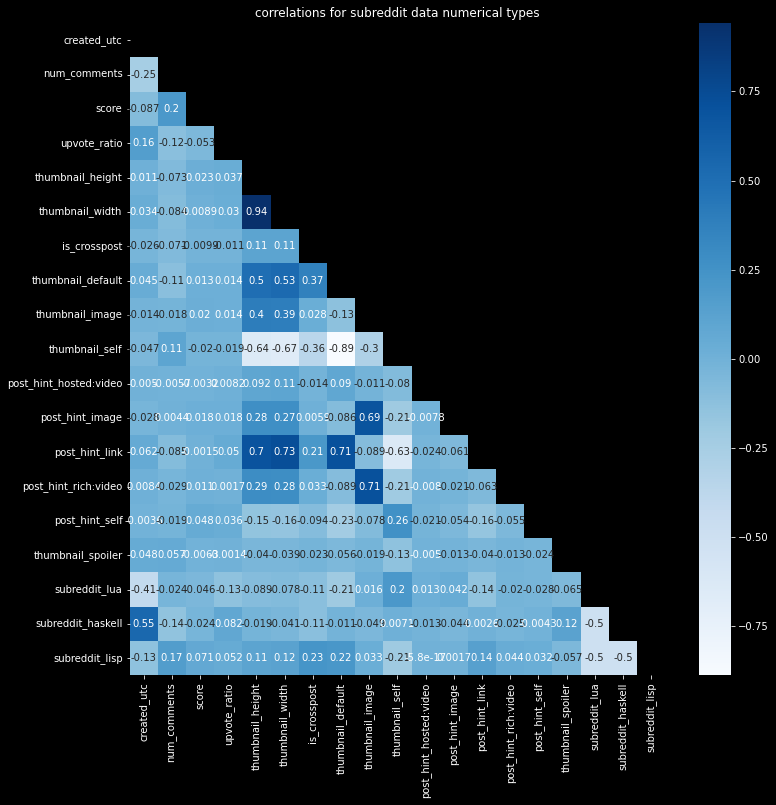

In [82]:
plot_correlation_matrix(df[numerical_types+target_dummies])
plt.title("correlations for subreddit data numerical types")

There is a lot here. A few things to note:

## created_utc

on the very left column, the `created_utc` is correlated with the subreddit types. This is simply because of the way we collected data --- there are a lot more in the haskell subreddit, so they tend to be newer. This needs to be removed before modelling or it would introduce a huge systematic overfit, making older posts too likely to be classified as lisp.


## thumbnail_height, thumbnail_width, thumbnail_image.
The sizes of thumbnails are closely associated with post_hints and "thumbnail_image".


I'm tempted to continue fiddling with these, but reducing dimensionality is perhaps not the best focus right now. The dimensionality will blow up significantly when a count vectorizer is applied in the next notebook.


## num_comments

The `num_comments` will tend to increase up to a maximum point for older posts.
It would be REALLY cool to get a "subreddit num_comments growth rate", the num_comments adjusted by how much time a submission has had to collect comments, and maybe an admission of a "maximum" `num_comments` each post is asymptotic towards, given infinite collection time.

In short,
**Do not fit classifier to created_utc or date directly.**
**num_comments may need to be adjusted for post age as well,** if it's going to be used.


In [83]:
#make dfs for each individual class to compare num_comments between them.
ha_df = df[df['subreddit_haskell'] == 1]
lu_df = df[df['subreddit_lua'] == 1]
li_df = df[df['subreddit_lisp'] == 1]

<AxesSubplot:>

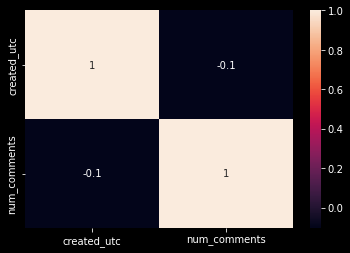

In [84]:
#surprisingly, num_comments isn't too closely correlated with created_utc. at least for lua.

sns.heatmap(lu_df_w_coms[['created_utc','num_comments']].corr(), annot = True)

In [85]:
#plot num_comments with created_utc for all data.
def heatmap_comments_time(df):
    sns.heatmap(df[['created_utc','num_comments']].corr(), annot = True)

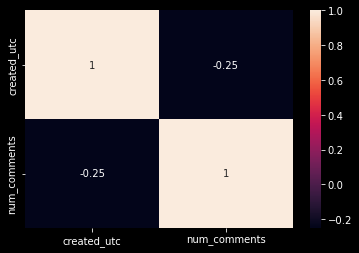

In [86]:
#it is strongly correlated for haskell and lisp, though. just keep in mind that these were
#gathered for different lengths of time up to the present.

#lisp:
heatmap_comments_time(li_df)

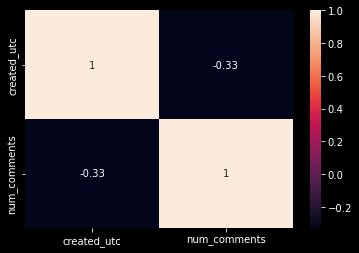

In [87]:
#haskell:
heatmap_comments_time(ha_df)

In [42]:
## Drop num_comments, created_utc, date
df.drop(columns = ['num_comments', 'created_utc', 'date'], inplace = True)
numerical_types.remove('created_utc')
numerical_types.remove('num_comments')

In [43]:
#look at the remaining columns
df.columns

Index(['is_crosspostable', 'is_original_content', 'is_reddit_media_domain',
       'is_robot_indexable', 'is_self', 'score', 'selftext', 'title',
       'upvote_ratio', 'thumbnail_height',
       ...
       'crosspost_subreddit_lambdachip', 'crosspost_subreddit_linux_gaming',
       'crosspost_subreddit_manool', 'crosspost_subreddit_sbcl',
       'crosspost_subreddit_scheme', 'crosspost_subreddit_sicp',
       'crosspost_subreddit_stumpwm', 'subreddit_haskell', 'subreddit_lisp',
       'subreddit_lua'],
      dtype='object', length=419)

# Create pairplots

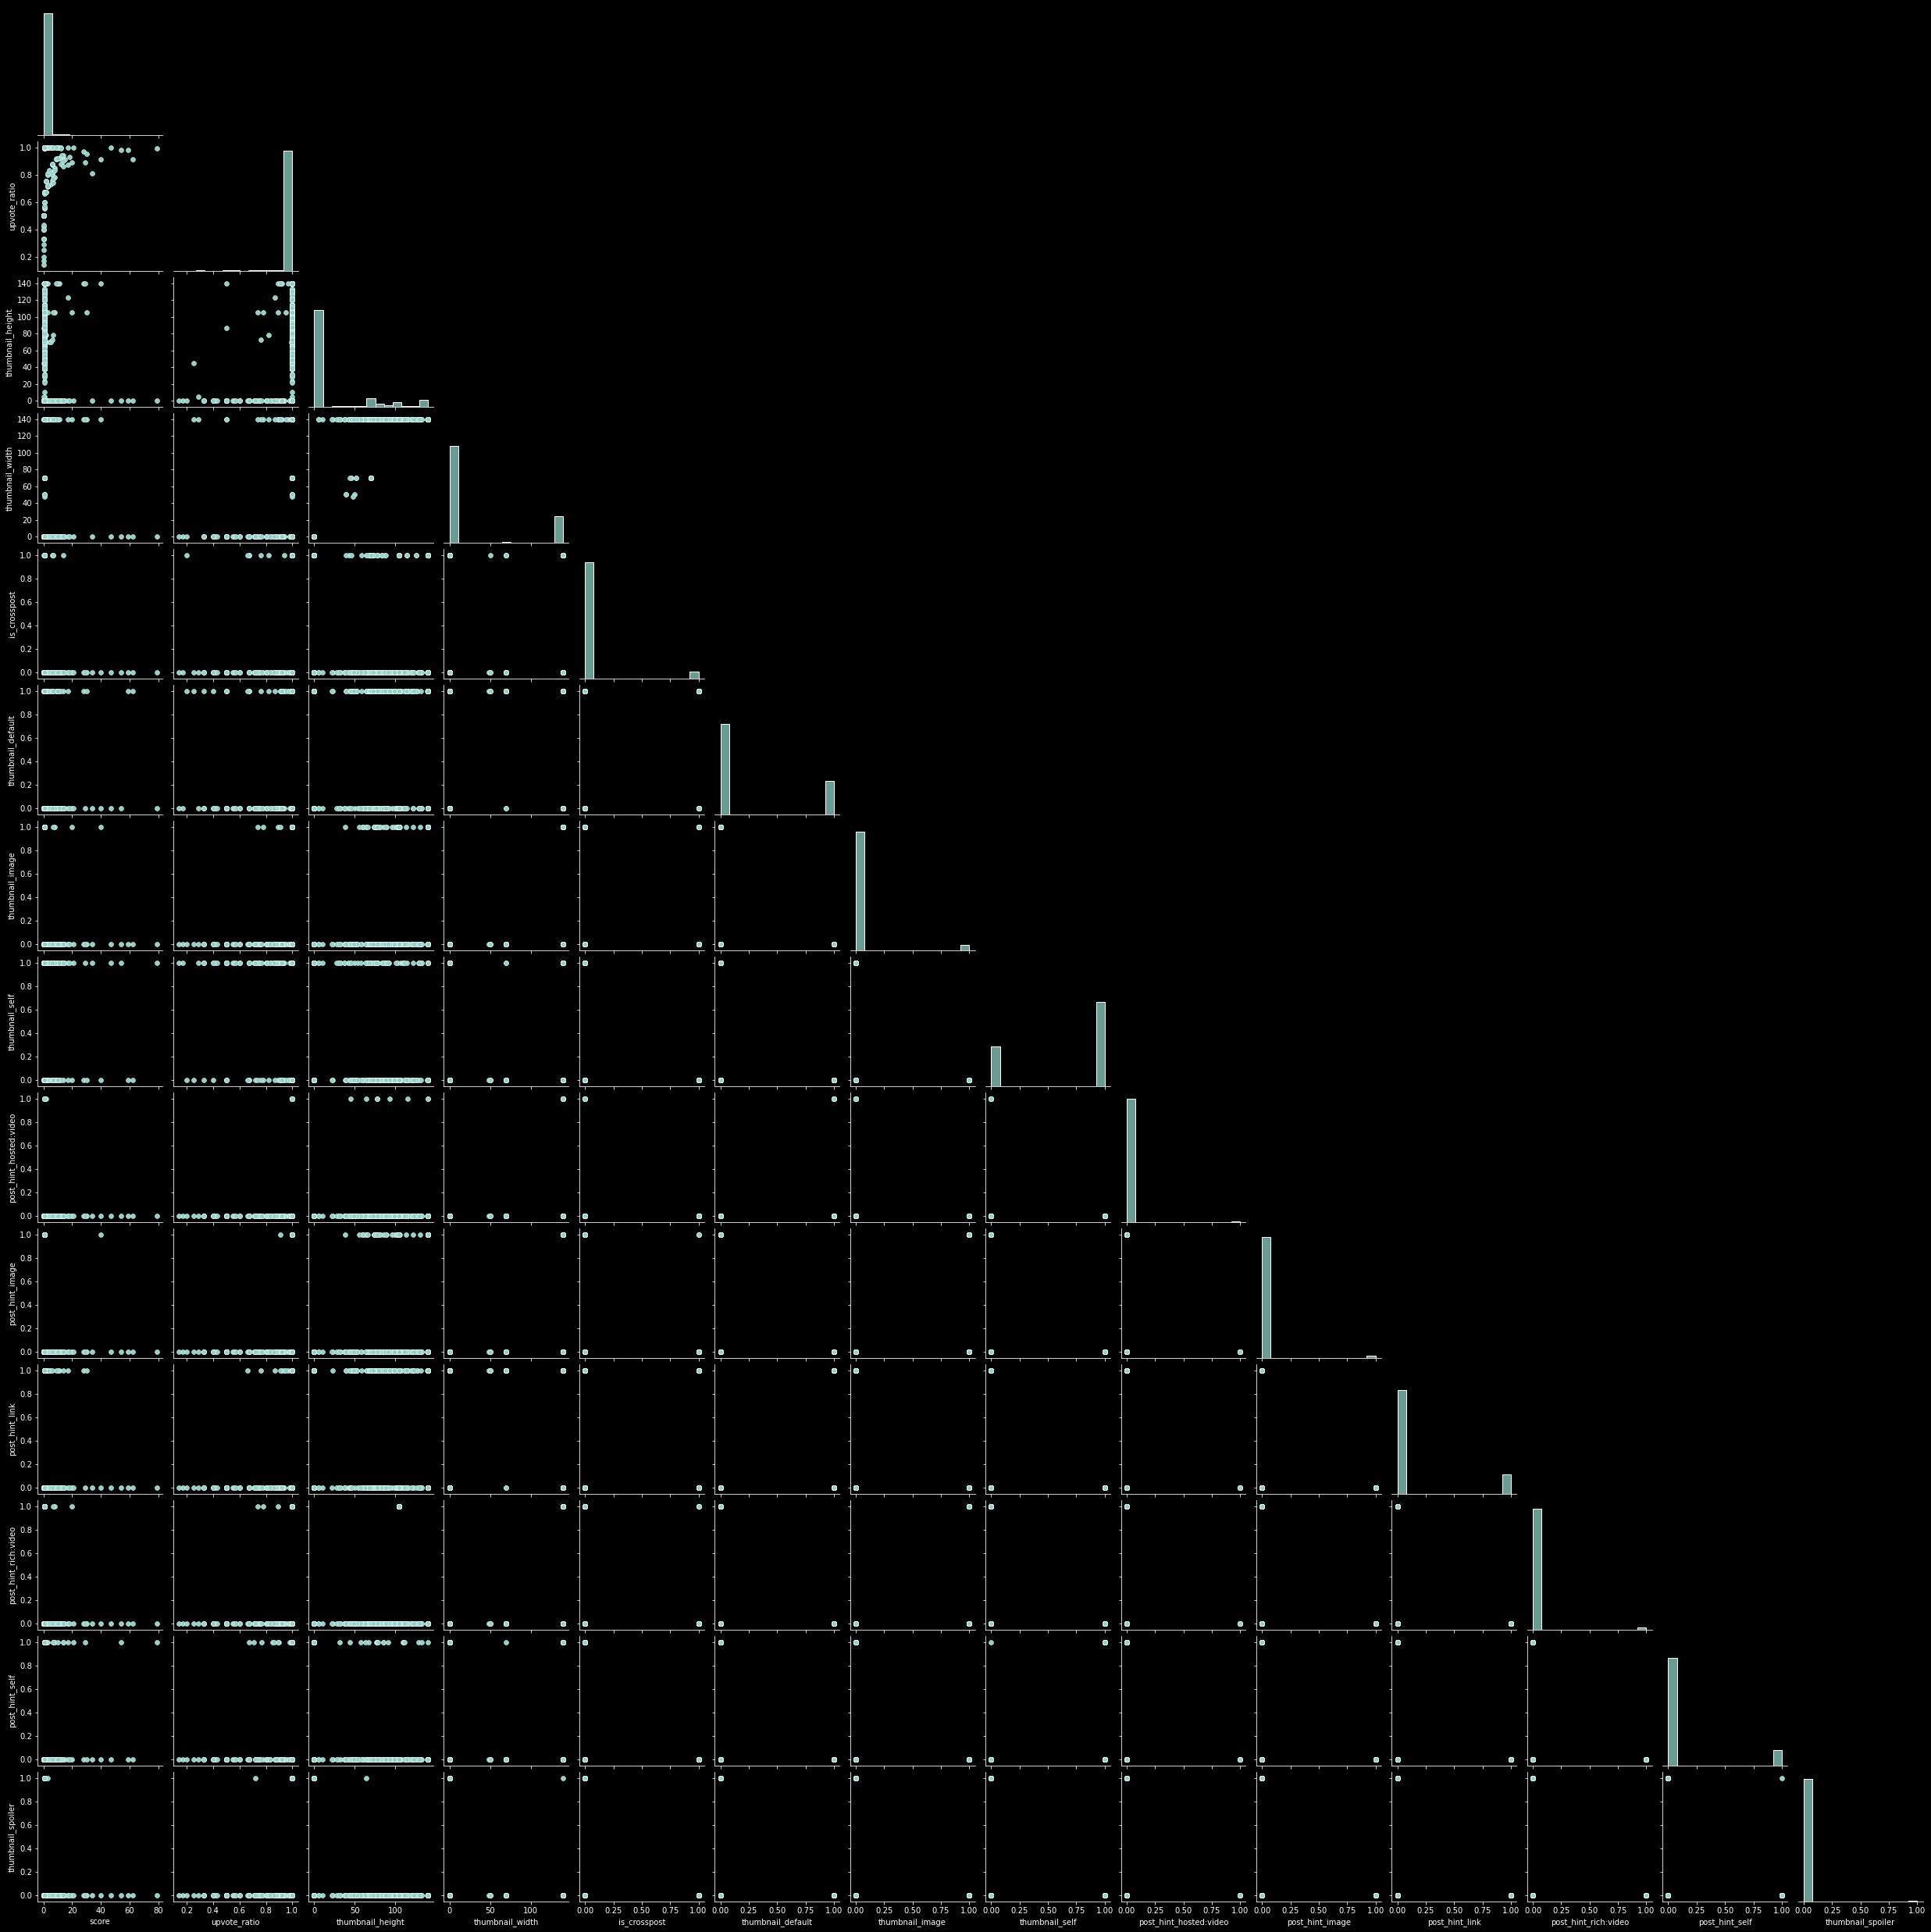

In [46]:
sns.pairplot(df[numerical_types], corner = True)

There are a lot combinations of features, but not many that strike one as pattern-full.
A lot of these are very one-side. Hopefully the minorities in each will span a lot of ground in identification --- as in, it is rare for any given submission to have one of these minorities in particular, but the odds of having one minority value amongst any of the large number of these kinds of features is significant.

# Export data with numerical treatment for text analysis.

In [47]:
df.to_csv('./data_clean_num/data_clean_num.csv')